<a href="https://colab.research.google.com/github/tuyiskevin/Fake_reviews/blob/main/Amazon_fake_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importin Necessary Libraries

In [1]:
%matplotlib inline
import pandas as pd
import pandas_profiling as pdp
import numpy as np
import matplotlib.pyplot as plt

# from matplotlib.colors import ListedColormap
import seaborn as sns
# import matplotlib.colors as colors
import warnings
warnings.filterwarnings('ignore')

### Import data

In [2]:
#amazon dataset
!wget https://raw.githubusercontent.com/tuyiskevin/Fake_reviews/main/Amazon_dataset%20\(2\).csv


--2021-05-10 01:35:04--  https://raw.githubusercontent.com/tuyiskevin/Fake_reviews/main/Amazon_dataset%20(2).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3850120 (3.7M) [text/plain]
Saving to: ‘Amazon_dataset (2).csv’

Amazon_dataset (2). 100%[===================>]   3.67M  --.-KB/s    in 0.04s   

2021-05-10 01:35:04 (96.7 MB/s) - ‘Amazon_dataset (2).csv’ saved [3850120/3850120]



# Data Exploration

In [52]:
df= pd.read_csv('Amazon_dataset (2).csv')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        9649 non-null   object
 1   customer_id        9649 non-null   int64 
 2   review_id          9649 non-null   object
 3   product_id         9649 non-null   object
 4   product_parent     9649 non-null   int64 
 5   product_title      9649 non-null   object
 6   product_category   9649 non-null   object
 7   star_rating        9649 non-null   int64 
 8   helpful_votes      9649 non-null   int64 
 9   total_votes        9649 non-null   int64 
 10  vine               9649 non-null   object
 11  verified_purchase  9649 non-null   object
 12  review_headline    9649 non-null   object
 13  review_body        9649 non-null   object
 14  review_date        9649 non-null   object
dtypes: int64(5), object(10)
memory usage: 1.1+ MB


In [54]:
df.shape
df.drop(columns=['marketplace','review_body','review_date'])


,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline
0,650634,R3EQSTM9PWRAL,B0091LBZSU,578484426,Demograss Capsules Diet Pills Lose Weight,Health & Personal Care,3,0,0,N,Y,Three Stars
1,19827510,RBWPRK17XKIXD,B00PWW3LQ6,456433146,Viva Labs #1 Premium Himalayan Organic Goji Be...,Health & Personal Care,5,0,0,N,Y,A good portable snack
2,1520474,RRSLOAF273XFC,B00DKEWA92,460764511,Whip-it Cleaner,Health & Personal Care,5,1,2,N,Y,You need this
3,23905905,R3S8W9Q6SWIT8O,B0015R3A7M,135102038,Optimum Nutrition Opti-Men Daily Multivitamin ...,Health & Personal Care,4,0,0,N,Y,this is a good vitamin for men
4,28215779,R3QQ6NSLRVBFJC,B006B8U8BG,200666829,Wet-Stop3 Bedwetting Enuresis Alarm with Loud ...,Health & Personal Care,4,0,0,N,Y,progress is definitely happening!!!!
...,...,...,...,...,...,...,...,...,...,...,...,...
9644,41618149,R3VC8DUIG6QPHL,B00P6TUO5G,170248843,"Viva Naturals Organic Non-GMO Cacao Powder, 2 ...",Personal_Care_Appliances,5,0,0,N,Y,I love every item I purchased from Viva Labs
9645,32163339,R3BJ2SMWI3G4NN,B00H9L7VIW,851045898,boostULTIMATE - 60 Capsules - Increase Workout...,Personal_Care_Appliances,4,1,1,N,N,It's a winner
9646,24434268,R1XFDT3V12UP0B,B0002DMANU,753810402,Duoderm Extra Thin Cgf Dressing,Personal_Care_Appliances,5,0,0,N,Y,Good deal.
9647,35176990,R153GIL6NRUJS9,B009S2LB3Q,904166782,Mega Motion Lift Chair Easy Comfort Recliner L...,Personal_Care_Appliances,4,1,1,N,Y,Good value and quality for the money


In [55]:
df.isnull().sum() # checking for null

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

#### Product distribution

### Understanding ratings distribution

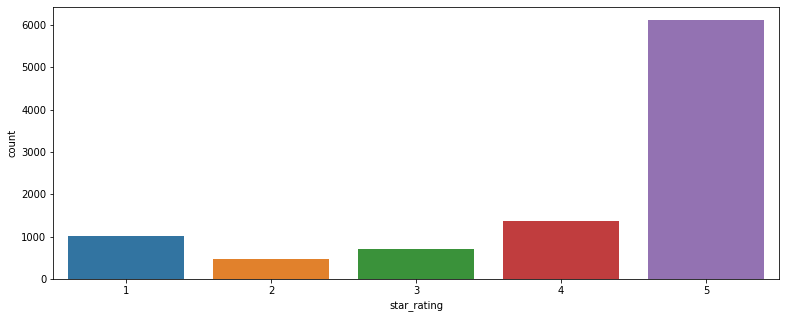

In [56]:
plt.subplots(figsize=(13,5))
sns.countplot(x='star_rating',data=df)
plt.show()

### Verification and vine program


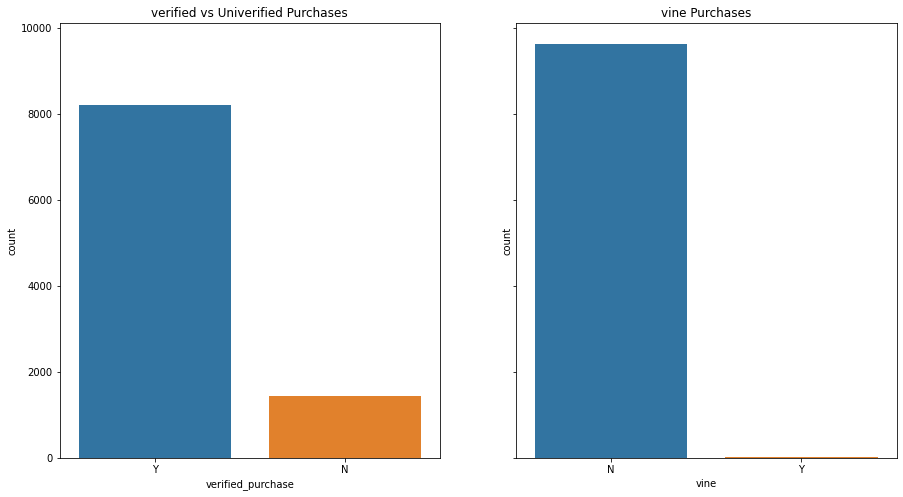

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

sns.countplot(ax=axes[0],x='verified_purchase',data=df)
axes[0].set_title("verified vs Univerified Purchases")
sns.countplot(ax=axes[1],x='vine',data=df)
axes[1].set_title("vine Purchases")
plt.show()

### Exploring univerified reviewers

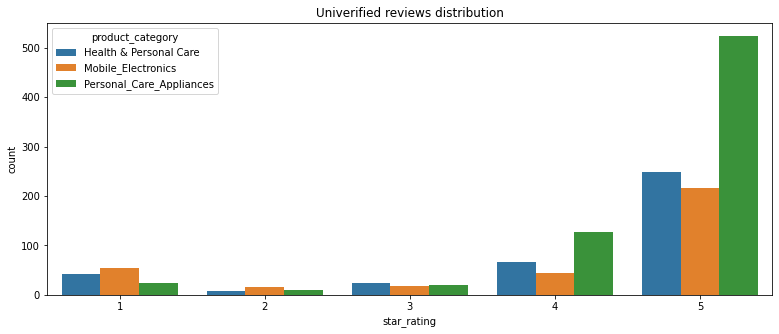

In [58]:
df_uni = df[(df.verified_purchase == 'N')]

plt.subplots(figsize=(13,5))
sns.countplot(x='star_rating',data=df_uni, hue='product_category')

plt.title("Univerified reviews distribution")
plt.show()

#### How helpful are fake reviews

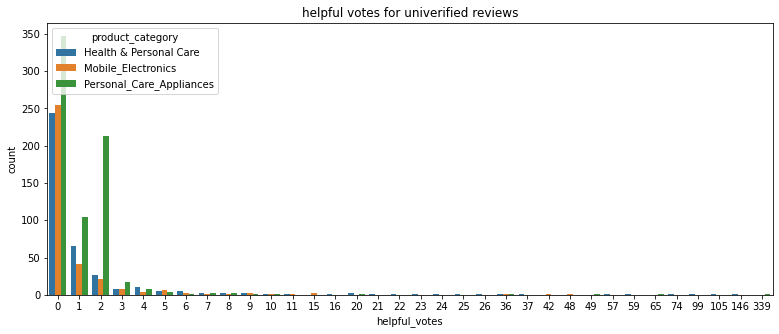

In [59]:
df_uni['product_parent'].value_counts()
df_uni_occ = df_uni[df_uni['product_parent']>5]
df_kmean = df_uni_occ[['star_rating','helpful_votes']]

plt.subplots(figsize=(13,5))
sns.countplot(x='helpful_votes',data=df_uni, hue='product_category')
plt.title("helpful votes for univerified reviews")
plt.show()

### Discovering patterns in The product ratings

### Potential Fake reviews

In [60]:
prod_count= df.groupby('product_parent',sort=False)['star_rating'].count()
prod_count = pd.DataFrame({'product_parent':prod_count.index, 'count':prod_count.values})
prod_avg = df.groupby('product_parent',sort=False)['star_rating'].mean().round(2)
prod_avg = pd.DataFrame({'product_parent':prod_avg.index, 'mean_rating':prod_avg.values})

####  Fake reviews (inflated rates)

Products with less than 3 ratings with at least 5 reviews

In [61]:
prod_count2 = prod_count.loc[prod_count['count']>=2]
prod_12 = prod_avg.loc[prod_avg['mean_rating']<=3]
prod_2_3 = pd.merge(prod_count2,prod_12,how='inner',on=['product_parent'])

fake_ir = pd.merge(prod_2_3,df_uni, how="inner", on=['product_parent'] )
fake_ir = fake_ir.loc[fake_ir['star_rating']>3] 
fake_ir.info() #14 reviews


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 3 to 46
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_parent     14 non-null     int64  
 1   count              14 non-null     int64  
 2   mean_rating        14 non-null     float64
 3   marketplace        14 non-null     object 
 4   customer_id        14 non-null     int64  
 5   review_id          14 non-null     object 
 6   product_id         14 non-null     object 
 7   product_title      14 non-null     object 
 8   product_category   14 non-null     object 
 9   star_rating        14 non-null     int64  
 10  helpful_votes      14 non-null     int64  
 11  total_votes        14 non-null     int64  
 12  vine               14 non-null     object 
 13  verified_purchase  14 non-null     object 
 14  review_headline    14 non-null     object 
 15  review_body        14 non-null     object 
 16  review_date        14 non-nu

#### Fake Reviews (deflated Rates)

Get all reviews with mean review of <3 rating and at least 3 reviews

In [62]:
prod_count3 = prod_count.loc[prod_count['count']>=3]
prod_3_3 = prod_avg.loc[prod_avg['mean_rating']>=3]
prod_3_3 = pd.merge(prod_count3,prod_3_3,how='inner',on=['product_parent'])

fake_dr = pd.merge(prod_2_3,df_uni, how="inner", on=['product_parent'] )
fake_dr = fake_dr.loc[(fake_dr['star_rating']<2)& (fake_dr['helpful_votes']<2)] 
fake_dr.info() #19 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 45
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_parent     19 non-null     int64  
 1   count              19 non-null     int64  
 2   mean_rating        19 non-null     float64
 3   marketplace        19 non-null     object 
 4   customer_id        19 non-null     int64  
 5   review_id          19 non-null     object 
 6   product_id         19 non-null     object 
 7   product_title      19 non-null     object 
 8   product_category   19 non-null     object 
 9   star_rating        19 non-null     int64  
 10  helpful_votes      19 non-null     int64  
 11  total_votes        19 non-null     int64  
 12  vine               19 non-null     object 
 13  verified_purchase  19 non-null     object 
 14  review_headline    19 non-null     object 
 15  review_body        19 non-null     object 
 16  review_date        19 non-nu

#### One time review

One time reviewed products with higher or lower rating

In [63]:
prod_count1 = prod_count.loc[prod_count['count']==1]
prod_15 = prod_avg.loc[(prod_avg['mean_rating']<=2) | (prod_avg['mean_rating']>=4)]
prod_1_5 = pd.merge(prod_count1,prod_15,how='inner',on=['product_parent'])

fake_1 = pd.merge(prod_1_5,df_uni, how="inner", on=['product_parent'] )
fake_1 = fake_1.loc[(fake_1['helpful_votes']<=2)]
fake_1.info() # 309 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 363
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_parent     309 non-null    int64  
 1   count              309 non-null    int64  
 2   mean_rating        309 non-null    float64
 3   marketplace        309 non-null    object 
 4   customer_id        309 non-null    int64  
 5   review_id          309 non-null    object 
 6   product_id         309 non-null    object 
 7   product_title      309 non-null    object 
 8   product_category   309 non-null    object 
 9   star_rating        309 non-null    int64  
 10  helpful_votes      309 non-null    int64  
 11  total_votes        309 non-null    int64  
 12  vine               309 non-null    object 
 13  verified_purchase  309 non-null    object 
 14  review_headline    309 non-null    object 
 15  review_body        309 non-null    object 
 16  review_date        309 non

### Consolidating and labelling

In [64]:
fake_reviews = pd.concat([fake_ir,fake_dr,fake_1])

####  Visualization

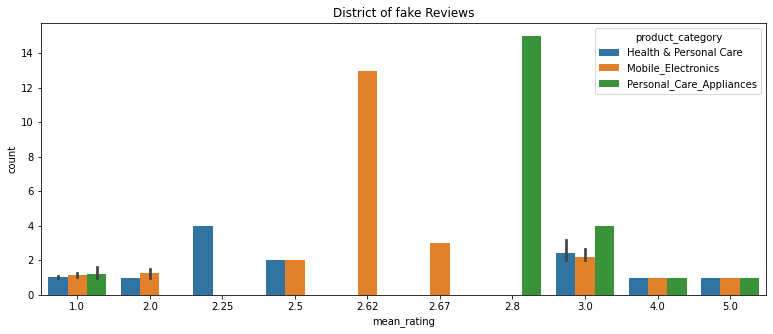

In [65]:
plt.subplots(figsize=(13,5))
sns.barplot(x="mean_rating", y="count", hue="product_category", data=fake_reviews);
plt.title("District of fake Reviews")
plt.show()

Export the data

In [66]:
fake_reviews['labels']=1
df['labels'] = 0
fake_reviews = fake_reviews.drop(columns=['count','mean_rating','marketplace','review_body','review_date'])
cond = df['review_id'].isin(fake_reviews['review_id'])
df.drop(df[cond].index, inplace = True)
# labeled dataset
df_new = pd.concat([df,fake_reviews])
df_new.reset_index(drop=True, inplace=True)
df_new.info()

# Exporting the newly created
df_new.to_csv('Fake_review.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        9307 non-null   object
 1   customer_id        9649 non-null   int64 
 2   review_id          9649 non-null   object
 3   product_id         9649 non-null   object
 4   product_parent     9649 non-null   int64 
 5   product_title      9649 non-null   object
 6   product_category   9649 non-null   object
 7   star_rating        9649 non-null   int64 
 8   helpful_votes      9649 non-null   int64 
 9   total_votes        9649 non-null   int64 
 10  vine               9649 non-null   object
 11  verified_purchase  9649 non-null   object
 12  review_headline    9649 non-null   object
 13  review_body        9307 non-null   object
 14  review_date        9307 non-null   object
 15  labels             9649 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+

#Machine larning Model

Import the data

In [67]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, accuracy_score 

# ! wget https://raw.githubusercontent.com/tuyiskevin/Fake_reviews/main/Fake_review.csv

In [68]:
df_r = pd.read_csv('Fake_review.csv')
df_r.head()

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,labels
0,650634,R3EQSTM9PWRAL,B0091LBZSU,578484426,Demograss Capsules Diet Pills Lose Weight,Health & Personal Care,3,0,0,N,Y,Three Stars,0
1,19827510,RBWPRK17XKIXD,B00PWW3LQ6,456433146,Viva Labs #1 Premium Himalayan Organic Goji Be...,Health & Personal Care,5,0,0,N,Y,A good portable snack,0
2,1520474,RRSLOAF273XFC,B00DKEWA92,460764511,Whip-it Cleaner,Health & Personal Care,5,1,2,N,Y,You need this,0
3,23905905,R3S8W9Q6SWIT8O,B0015R3A7M,135102038,Optimum Nutrition Opti-Men Daily Multivitamin ...,Health & Personal Care,4,0,0,N,Y,this is a good vitamin for men,0
4,28215779,R3QQ6NSLRVBFJC,B006B8U8BG,200666829,Wet-Stop3 Bedwetting Enuresis Alarm with Loud ...,Health & Personal Care,4,0,0,N,Y,progress is definitely happening!!!!,0


### Models for training

In [69]:
labels = df_r[["labels"]]
df_x = df_r.drop(columns=["labels","product_title","review_headline","review_id", "vine", "product_id"])

#encode columns
encoder = LabelEncoder()
df_x['product_category'] = encoder.fit_transform(df_x["product_category"])
df_x['verified_purchase'] = encoder.fit_transform(df_x["verified_purchase"])
df_x.head(4)
# split data into training and testing sets


,customer_id,product_parent,product_category,star_rating,helpful_votes,total_votes,verified_purchase
0,650634,578484426,0,3,0,0,1
1,19827510,456433146,0,5,0,0,1
2,1520474,460764511,0,5,1,2,1
3,23905905,135102038,0,4,0,0,1


Split the data

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df_x, labels , test_size=0.33, random_state=42)
print(len(X_train))
print(y_test)

6464
      labels
2997       0
8074       0
4012       0
2392       0
3284       0
...      ...
2952       0
1350       0
8134       0
1811       0
3555       0

[3185 rows x 1 columns]


#### Logistic Regression

{'accuracy': 0.9638932496075353, 'precision': 0.0, 'recall': 0.0, 'f_measure': 0.0, 'specificity': 1.0, 'sensitivity': 0.0}


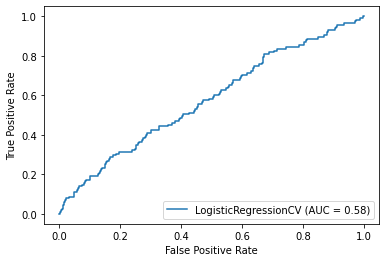

In [71]:
l_model = LogisticRegressionCV(cv=5,random_state=0)

l_model.fit(X_train,y_train)
y_pred = l_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f_measure = metrics.f1_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
sensitivity = (tp / (tp + fn))
specificity = (tn / (tn + fp))
results = {'accuracy': accuracy, 'precision': precision,
               'recall': recall, 'f_measure': f_measure,
               'specificity': specificity,
               'sensitivity': sensitivity}

print(results)

y_probas = l_model.predict_proba(X_test);
metrics.plot_roc_curve(l_model,X_test,y_test)
plt.show()

Great result but terrible specificity as exemplified by the f-score of 0.
This imbalance is mainly caused by the the small percentage of fake reviews present in our dataset. we can overcome this using Synthetic Minority Oversampling Technique(SMOTE)

Current label classes look like this

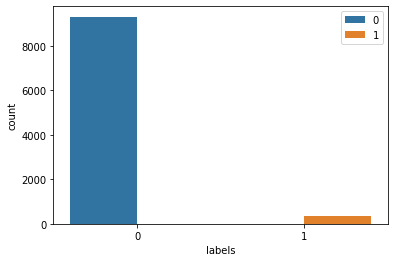

In [72]:
counter = Counter(labels)

# for label, _ in counter.items():
# 	row_ix = where(labels == label)[0]
# 	plt.scatter(df_r[row_ix, 0], df_r[row_ix, 12], label=str(label))
sns.countplot(data=df_r, x="labels", hue="labels")
plt.legend()
plt.show()

### Up-sampling with SMOTE method

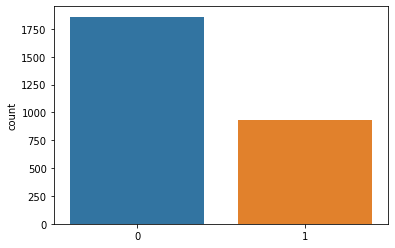

In [73]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(df_x, labels)
sns.countplot(x=y)
plt.show()

Re run The logistic model on the upsampled data

Split the data again

In [74]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y , test_size=0.33,random_state=42)
print(X_test)

      customer_id  product_parent  ...  total_votes  verified_purchase
2997     51875544       803008203  ...            1                  1
8074       147053       851045898  ...            3                  0
4012     12511385       742440014  ...            0                  1
2392     11770549       802050753  ...            0                  1
3284     16166868       536367292  ...            0                  1
...           ...             ...  ...          ...                ...
2952     27897382       353925130  ...            0                  1
1350     35741966        97495019  ...            1                  1
8134     19138829       851045898  ...            0                  0
1811     26419701       141009874  ...            1                  1
3555       158576       205524315  ...            0                  1

[3185 rows x 7 columns]


Run Model

{'accuracy': 0.6666666666666666, 'precision': 0.0, 'recall': 0.0, 'f_measure': 0.0, 'specificity': 1.0, 'sensitivity': 0.0}


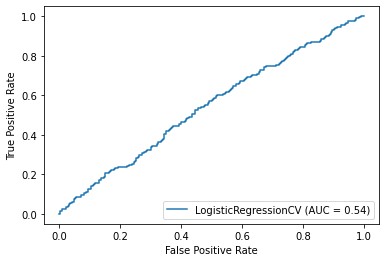

In [75]:
l_model.fit(X_train_,y_train_)
y_pred = l_model.predict(X_test_)

accuracy = metrics.accuracy_score(y_test_, y_pred)
precision = metrics.precision_score(y_test_, y_pred)
recall = metrics.recall_score(y_test_, y_pred)
f_measure = metrics.f1_score(y_test_, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_, y_pred).ravel()
sensitivity = (tp / (tp + fn))
specificity = (tn / (tn + fp))
results = {'accuracy': accuracy, 'precision': precision,
               'recall': recall, 'f_measure': f_measure,
               'specificity': specificity,
               'sensitivity': sensitivity}

print(results)
metrics.plot_roc_curve(l_model,X_test_,y_test_)
plt.show()

#### Decisition tree

{'accuracy': 0.9660910518053375, 'precision': 0.8888888888888888, 'recall': 0.06956521739130435, 'f_measure': 0.12903225806451613, 'specificity': 0.9996742671009772, 'sensitivity': 0.06956521739130435}


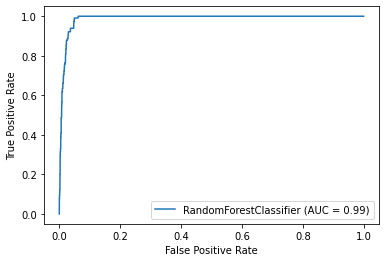

In [76]:
l_model = RandomForestClassifier(max_depth=5, random_state=0)
l_model.fit(X_train,y_train)
y_pred = l_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f_measure = metrics.f1_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
sensitivity = (tp / (tp + fn))
specificity = (tn / (tn + fp))
results = {'accuracy': accuracy, 'precision': precision,
               'recall': recall, 'f_measure': f_measure,
               'specificity': specificity,
               'sensitivity': sensitivity}

print(results)

y_probas = l_model.predict_proba(X_test);
metrics.plot_roc_curve(l_model,X_test,y_test)
plt.show()

The decision tree performs miles better compared to the logistic regression

Now we test with a more balanced dataset

{'accuracy': 0.9554831704668838, 'precision': 0.9030303030303031, 'recall': 0.9706840390879479, 'f_measure': 0.9356357927786499, 'specificity': 0.9478827361563518, 'sensitivity': 0.9706840390879479}


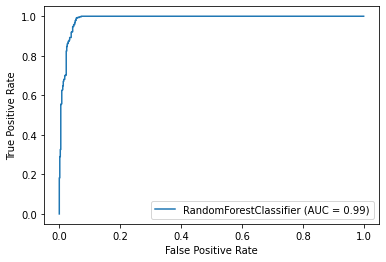

In [77]:
l_model.fit(X_train_,y_train_)
y_pred = l_model.predict(X_test_)

accuracy = metrics.accuracy_score(y_test_, y_pred)
precision = metrics.precision_score(y_test_, y_pred)
recall = metrics.recall_score(y_test_, y_pred)
f_measure = metrics.f1_score(y_test_, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test_, y_pred).ravel()
sensitivity = (tp / (tp + fn))
specificity = (tn / (tn + fp))
results = {'accuracy': accuracy, 'precision': precision,
               'recall': recall, 'f_measure': f_measure,
               'specificity': specificity,
               'sensitivity': sensitivity}

print(results)
metrics.plot_roc_curve(l_model,X_test_,y_test_)
plt.show()

What's important here is that the balancing of classes has no effect on the performance of the model. If anything, the balancing can at times become less accurate than the imbalanced data.

#### Conclusion

From the above model, it's clear that  random forest models is best suited to predict a fake review. 
This is because our dataset comprises largely of categorical data in one way or ther other. This makes the RF algorithm best suited for the task and it's reflected in it's performance.

#### what to improve in the future

Currently, our model can only predict for an amazon product within these three categories, Personal Care Appliances, Mobile accessories, and Health & Personal care. 
- With more computing power, we could predict for all the amazon categories and come up with a model that can easily identify a fake review from any category. 
- it's also worth noting that one would want to explore the language used in the review and couple it with this model to come up with a holistic model that can not only predict based on the numeral statistics but also the language used.
- This would explan our criteria much further allowing this model to be used not only for amazon reviews but also yelp and other reviewing platforms.